## Assignment 6 : Working with superdense coding, Teleportation

## Section 1

Superdense Coding Protocol is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication. Implement the superdense coding protocol
in Qiskit. Refer https://qiskit.org/textbook/ch-algorithms/superdense-coding.

In [1]:
from qiskit import QuantumCircuit
# from qiskit_ibmq_provider import IBMQ
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [2]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [3]:
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

In [4]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [5]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case, sending the message '10'.
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()

# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

{'10': 1024}


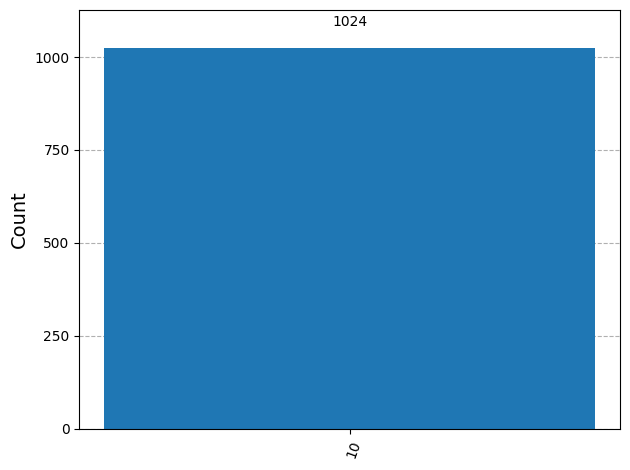

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Section 2

Teleportation Protocol is a procedure by which the state of qubit (|ψ⟩) can be transmitted from one
location to another using two bits of classical communication and a Bell pair. Implement the teleportation protocol in Qiskit. Refer https://qiskit.org/textbook/ch-algorithms/teleportation.htm

In [7]:
# Quantum Teleportation Protocol in Qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector , plot_histogram
from qiskit_aer import Aer
from math import sqrt , pi
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(3, 2)

# Step 1: Prepare state to teleport (on qubit 0)
qc.h(0)  # Creates superposition state

# Step 2: Create Bell pair between qubits 1 and 2, successive h and cx gates
qc.h(1)
qc.cx(1, 2)

# Step 3: Bell measurement on qubits 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

# Step 4: Use classical bits to apply corrections to qubit 2
qc.cx(1, 2)
qc.cz(0, 2)

# Visualize the circuit
qc.draw()


┌───┐          ┌───┐┌─┐        
q_0: ┤ H ├───────■──┤ H ├┤M├──────■─
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘      │ 
q_1: ┤ H ├──■──┤ X ├─┤M├──╫───■───┼─
     └───┘┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ 
q_2: ─────┤ X ├───────╫───╫─┤ X ├─■─
          └───┘       ║   ║ └───┘   
c: 2/═════════════════╩═══╩═════════
                      1   0

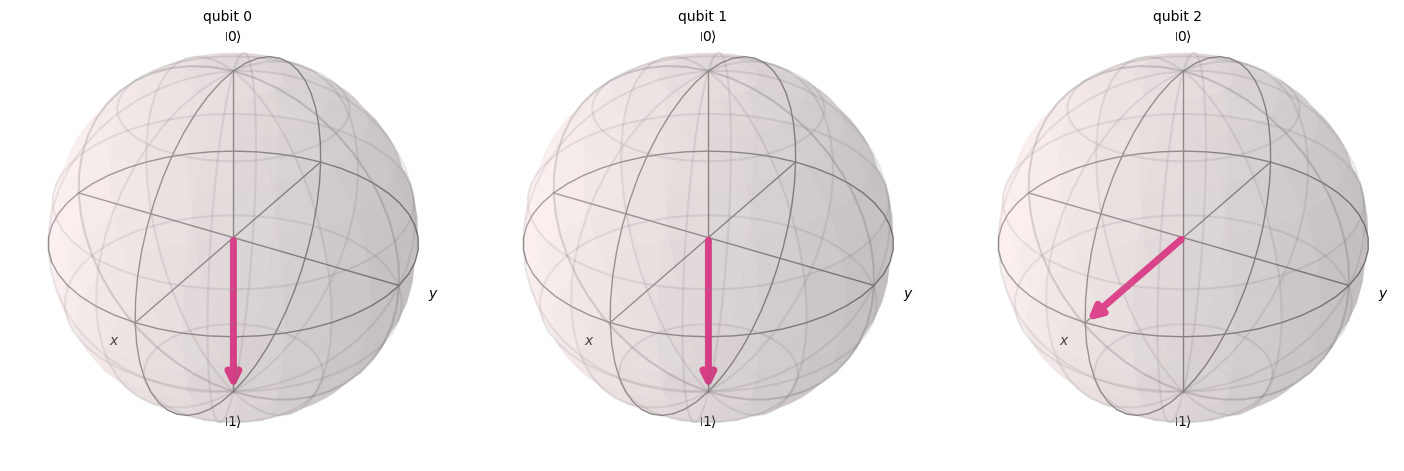

In [8]:
from qiskit import transpile
from qiskit_aer import Aer

# Use Aer simulator
sim = Aer.get_backend('aer_simulator')

# Save state after teleportation
qc.save_statevector()

# Run simulation
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
state = result.get_statevector()

# Check final state of qubit 2
plot_bloch_multivector(state)


## Section  3

Explain the procedure of reverse CNOT using the concept of Phase Kickback. You can
implement the reverse CNOT operation in Qiskit.

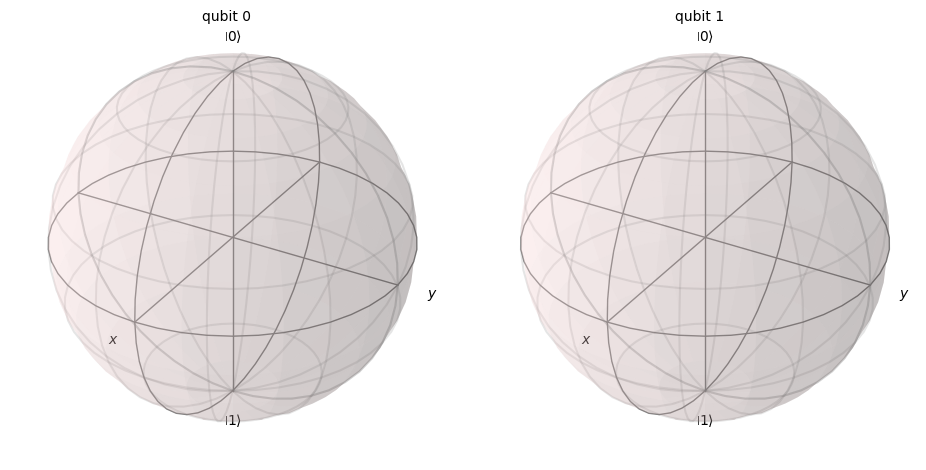

In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# Put qubit 0 (intended target) in superposition
qc.h(0)

# Set control qubit (qubit 1) to |1>
qc.x(1)

# Basis transformation to exploit kickback
qc.h(0)
qc.h(1)

# Reverse CNOT using phase kickback
qc.cx(1, 0)

# Return to original state
qc.h(0)
qc.h(1)

# Save final state
qc.save_statevector()

# Simulate
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
state = result.get_statevector()

plot_bloch_multivector(state)


Implement the kickback process using T-gate

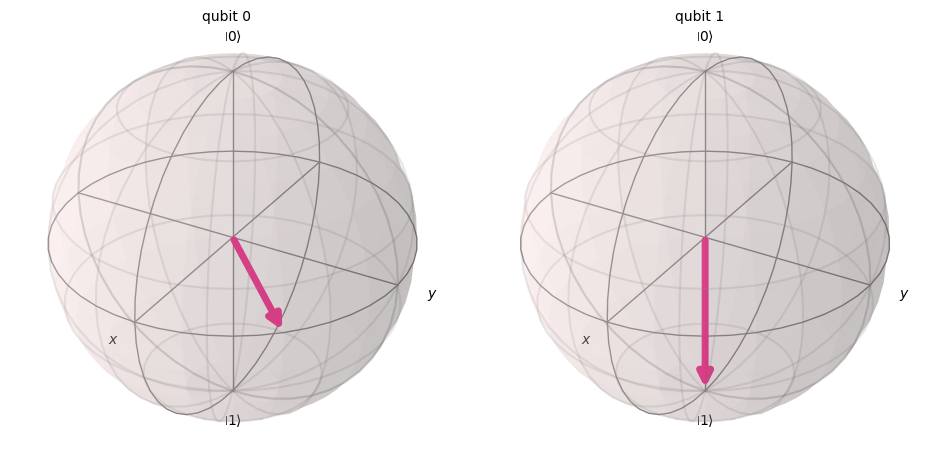

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# Put control qubit (q0) in superposition
qc.h(0)

# Target qubit (q1) in |1>
qc.x(1)

# Apply controlled-T gate
qc.cp(pi/4, 0, 1)  # Equivalent to controlled-T

# Save state
qc.save_statevector()

# Simulate
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
state = result.get_statevector()

plot_bloch_multivector(state)
